In [5]:
from scipy import optimize
%pylab inline


Populating the interactive namespace from numpy and matplotlib


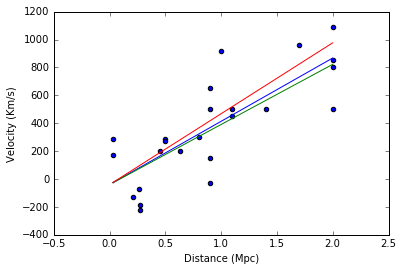

The Hubble constant for Hubble data 1 is: 453.859994085 +- 77.1561989944


In [58]:
data1 = 'hubble1.dat'    #load old hubble data
hubble1 = np.loadtxt(data1, usecols = (2, 3))    

data2 = 'hubble2.dat'    #load new hubble data
hubble2 = np.loadtxt(data2)

velocity1 = hubble1[:, 1]    
velocity2 = hubble2[:, 5]

distance1 = hubble1[:, 0]
distance2 = hubble2[:, 4]

(m, b) = polyfit(distance1, velocity1, 1)    #line fit and plot
y1 = polyval([m, b], distance1)
y2 = polyval([m*.95, b], distance1)
y3 = polyval([m*1.12, b], distance1)
plt.plot(distance1, y1)
plt.plot(distance1, y2)
plt.plot(distance1, y3)
plt.scatter(distance1, velocity1)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (Km/s)')

def H_const(distance, velocity, name, error):    # Hubble constant (slope)
    (m, b) = polyfit(distance, velocity, 1)
    print 'The Hubble constant for ' + name + ' is:', m ,"+-", m*error

plt.show()
H_const(distance1, velocity1, 'Hubble data 1', .17 )



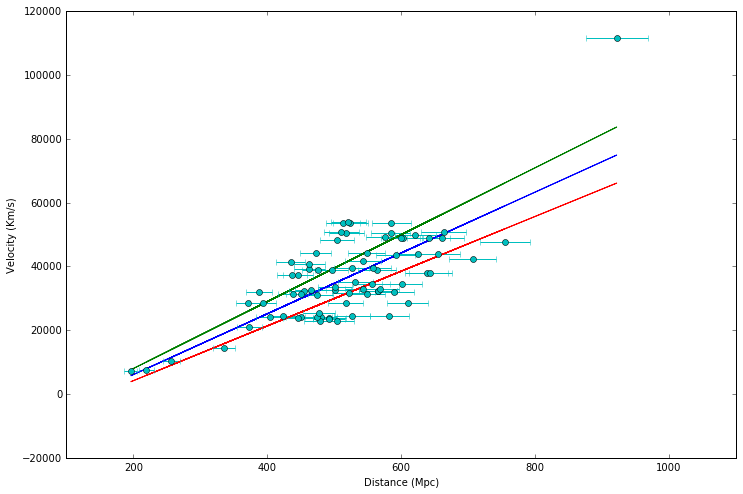

The Hubble constant for Hubble data 2 is: 95.3815270598 +- 19.076305412


In [61]:
(m, b) = polyfit(distance2, velocity2, 1)    #line fit and plot
y1 = polyval([m, b], distance2)
y2 = polyval([m*1.1, b], distance2)
y3 = polyval([m*.9, b], distance2)
plt.figure(figsize = (12, 8))
plt.plot(distance2, y1)
plt.plot(distance2, y2)
plt.plot(distance2, y3)
plt.scatter(distance2, velocity2)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (Km/s)')
plt.errorbar(distance2, velocity2, xerr = distance2*.05, fmt = 'o')

plt.show()
H_const(distance2, velocity2, 'Hubble data 2', .20)


#plt.plot(distance1, velocity1)

In [78]:
from scipy import integrate

c = 3e5
omega_r = 8.5e-5
omega_m = 0.27
omega_lamda = .73
H0 = 72
Dh = c/H0
K = np.power((1/Dh), 2)*(omega_m + omega_lamda - 1)

z = np.linspace(0, 5, 6)

def E(z):
    return np.power((1+z)**4 * omega_r + ((1+z)**3) * omega_m + omega_lamda, 0.5)

def f(z):
    return Dh * (1/E(z))

function = lambda z: f(z)
integrate.quad(function, 0 , 5)

D_c = []
for i in range(100):
    solutions = integrate.quad(function, 0, 5 * (i + 0.0)/100.0)
    D_c.append(solutions[0])
    
y = np.linspace(0, 5, 100)

D_L = D_c * (1 + y)
D_A = D_c / (1 + y)

y1 = np.linspace(0, 1000, 1000)

H_Z = H0 * E(y1)

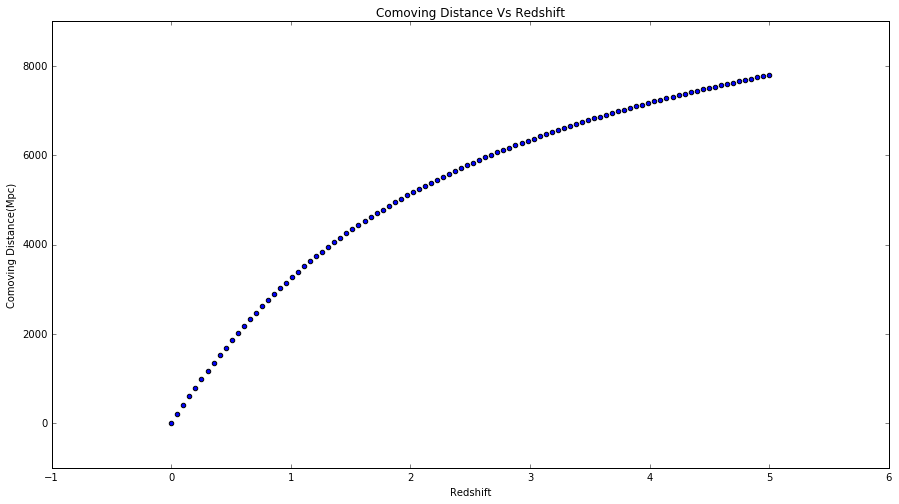

In [71]:
plt.figure(figsize = (15, 8))
plt.scatter(y, D_c)
plt.title('Comoving Distance Vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('Comoving Distance(Mpc)');

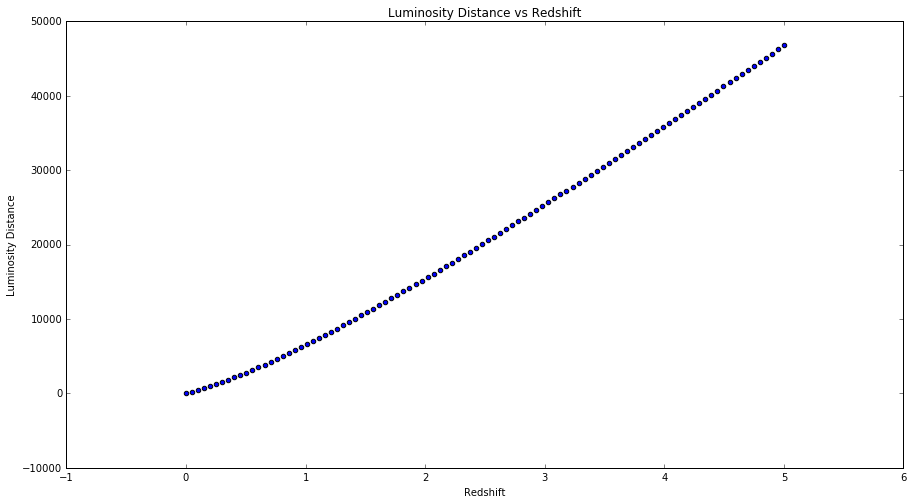

In [75]:
plt.figure(figsize = (15, 8))
plt.scatter(y, D_L)
plt.title('Luminosity Distance vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('Luminosity Distance');

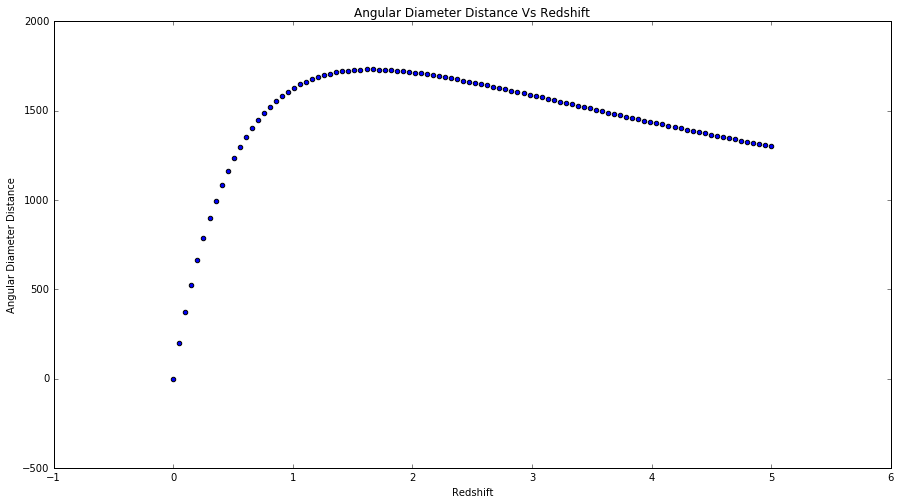

In [76]:
plt.figure(figsize = (15, 8))
plt.scatter(y, D_A)
plt.title('Angular Diameter Distance Vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('Angular Diameter Distance');

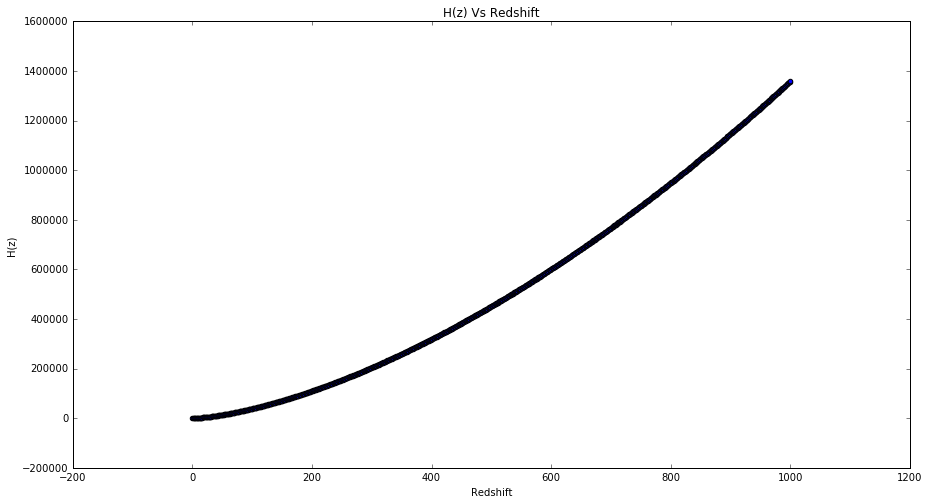

In [79]:
plt.figure(figsize = (15, 8))
plt.scatter(y1, H_Z)
plt.title('H(z) Vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('H(z)');